In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import inv
from math import *

In [63]:
data = pd.read_csv('data.csv')

# using my code in ML bootcamp

In [65]:
class MyLinearRegression(object):
    """    Description:        My personnal linear regression class to fit like a boss.   
    """
    def __init__(self, theta):
        """     Description:
        generator of the class, initialize self.
        Args:
            theta: has to be a list or a numpy array,
            it is a vector ofdimension (number of features + 1, 1).
            Raises:
           This method should noot raise any Exception.        
        """
        if (not isinstance(theta, list) and not isinstance(theta, np.ndarray)
        and theta.shape[1] != 1):
            print("error")
        if isinstance(theta, list):
            theta = np.array(theta).reshape(-1,1)
        self.theta = theta
    def setTheta(self, theta):
        if (not isinstance(theta, list) and not isinstance(theta, np.ndarray)
        and theta.shape[1] != 1):
            print("error")
        if isinstance(theta, list):
            theta = np.array(theta)
        self.theta = theta	
    def	concat(self, X):
        M = X.shape[0]
        ones = np.ones((M,1))
        X = np.concatenate((ones,X),axis=1)
        return X
    def predict_(self, X):
        X = self.concat(X)
        return X.dot(self.theta)
    def cost_elem_(self, X, Y):
        M = Y.shape[0]
        pred = X.dot(self.theta)
        return np.power((pred - Y),2,dtype=float) * (0.5 / M)
    def cost_(self, X, Y):
        return float(sum(self.cost_elem_(X, Y)))
    def grad_(self, error, X):
        X = self.concat(X)
        return (X.transpose()).dot(error)
    def mse_(self,X, Y):
        error = X.dot(self.theta) - Y
        M = float(Y.shape[0])
        return float(sum(np.power(error,2,dtype=float)) / M)
    def fit_(self, X, Y, alpha=1.6e-4,n_cycle=1000000):
        M = Y.shape[0]
        X = self.concat(X)
        for i in range(int(n_cycle)):
            error = X.dot(self.theta) - Y
            grad = (X.transpose()).dot(error)
            self.theta = self.theta - alpha * (1. / M ) * 0.5 * grad
            if i % 1000 == 0:
                print("cost: {}".format(self.mse_(X, Y)),end='\r')
        return self.theta
    def normalequation_(self, X, Y):
        X = self.concat(X)
        X_t = X.transpose()
        xx_t = X_t.dot(X).astype(np.int)
        X_ty = X_t.dot(Y)
        xx_ti = inv(xx_t)
        print(self.theta.shape)
        self.theta = (xx_ti.transpose()).dot(X_ty)
        print(self.theta.shape)
        return self.theta
    def rmse_(self, X, Y):
        return float(sqrt(self.mse_(X,Y)))
    def r2score_(self, X, Y):
        Yp = self.predict_(X)
        meanY = np.mean(Y)
        SStot = np.power(Y - meanY, 2,dtype=float)
        SSres = np.power(Y - Yp, 2,dtype=float)
        return float(1 - float(SSres / SStot))

In [66]:
theta = np.random.randn(2,1)*np.sqrt(2./x.shape[0]) # he init

In [67]:
theta

array([[-0.35154564],
       [-0.25887151]])

In [68]:
mo = MyLinearRegression(theta)

In [69]:
x = data['km'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)

scale data f

In [70]:
scaler = MinMaxScaler()
scaler = scaler.fit(x)
x = scaler.transform(x)
scaler = scaler.fit(y)
y = scaler.transform(y)

In [59]:
mo.fit_(x,y)

array([[ 0.92948376],
       [-0.97761569]])

In [60]:
y_pred = mo.predict_(x)

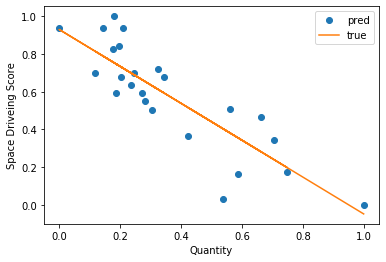

In [74]:
plot1 = plt.plot(x, y, marker='o',linestyle='None')
plot2 = plt.plot(x, y_pred)
plt.xlabel('Quantity')
plt.ylabel('Space Driveing Score')
plt.legend({'pred':'true','true':'false'})
plt.show()